In [1]:
from PIL import Image
import PIL
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
%matplotlib inline

### Data Setup

JPEG
RGB
(2048, 1254)


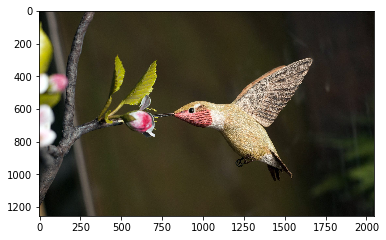

In [2]:
image = Image.open('bird.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)

pixels = np.asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')

# show the image
imshow(np.asarray(image))

In [3]:
def grid_display(list_of_images, list_of_titles=[], no_of_columns=6, figsize=(10,10)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i])
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])

### Image Normalization
A pixel value is normalised by subtracting the min value and dividing by the max minus the min.

In [4]:
# Pre normalization -  pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print("Before normalization")
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# normalize to the range 0-1
pixels /= 255.0

# Post normalization
print("\nAfter normalization")
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: float32
Before normalization
Min: 0.000, Max: 255.000

After normalization
Min: 0.000, Max: 1.000


### Standardization
Substract by the mean and divide by the standard deviation

In [5]:
pixels = np.asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')

In [6]:
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 54.416, Standard Deviation: 47.179


In [7]:
# global standardization of pixels
pixels = (pixels - mean) / std

In [8]:
#Mean and standard deviation post standardization
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 0.000, Standard Deviation: 1.000


### Smart Image cropping library

## Katna
Katna is a open source library that handles the task(s) for smart cropping.
The Smart crop feature tries to automatically identify important image areas where the user will focus more and tries to retain it while cropping. For a given input cropping dimension/final output image size, following selection and filtering criteria are used.

In [9]:
#!pip install katna

In [10]:
from Katna.image import Image

In [11]:
img_module = Image()

In [12]:
image_file_path = ('./bird.jpg')
# folder to save extracted images. Make sure the output folder is created beforehand
output_folder_cropped_image = "selectedcrops"

In [13]:
crop_list = img_module.crop_image(
   file_path=image_file_path,
   crop_width=600,
   crop_height=600,
   num_of_crops=5
)


In [14]:
 if len(crop_list) > 0:
        
        img = cv2.imread(image_file_path)
        
        for counter, crop in enumerate(crop_list):
            img_module.save_crop_to_disk(
                crop,
                img,
                file_path=output_folder_cropped_image,
                file_name="cropped_image_" + str(counter),
                file_ext=".jpeg",
            )

selectedcrops/*.jpeg


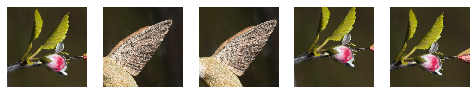

In [15]:
output_images=os.path.join(output_folder_cropped_image, "*.jpeg") 
print(output_images)
images = [ PIL.Image.open(f) for f in glob(output_images) ]
grid_display(images)

#### Github - https://github.com/keplerlab/katna